In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/train_Df64byy.csv')


data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
data.shape

(50882, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
data['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [ ]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [ ]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
data_num=data.select_dtypes(include={'float64','int64'})
data_num.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,36,36,3.0,22,11628.0,0
1,2,1117,75,22,NaN,22,30510.0,0
2,3,3732,32,32,1.0,19,7450.0,1
3,4,4378,52,48,3.0,19,17780.0,0
4,5,2190,44,44,1.0,16,10404.0,0


In [ ]:
data_cat=data.select_dtypes(include='object')
data_cat.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0


In [ ]:
data_cat.isnull().sum()

City_Code                      0
Accomodation_Type              0
Reco_Insurance_Type            0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
dtype: int64

In [ ]:
#data_cat.drop('Health Indicator',axis=1,inplace=True)
data_cat['Health Indicator'].mode()

0    X1
dtype: object

In [ ]:
data_cat['Holding_Policy_Duration'].mode()

0    1.0
dtype: object

In [ ]:
data_cat['Health Indicator'].fillna('X1',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#data_cat.drop('Holding_Policy_Duration',axis=1,inplace=True)
data_cat['Holding_Policy_Duration'].fillna('1.0',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_cat.isnull().sum()

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_ordinal = encoder.fit_transform(data_cat)
print(data_ordinal)

[[22.  1.  0.  0.  0.  5.]
 [31.  0.  1.  0.  1.  0.]
 [31.  0.  0.  0.  0.  0.]
 ...
 [ 0.  1.  0.  0.  1.  5.]
 [ 0.  0.  1.  0.  1.  7.]
 [22.  1.  0.  0.  2.  7.]]


In [ ]:
# Create the dataframe
data_ord = pd.DataFrame(data_ordinal,columns=['City_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration'])
data_ord.head()


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,22.0,1.0,0.0,0.0,0.0,5.0
1,31.0,0.0,1.0,0.0,1.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,16.0,0.0,1.0,0.0,0.0,5.0
4,34.0,1.0,0.0,0.0,1.0,8.0


In [ ]:
data_num.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
data_num.isnull().sum()

ID                         0
Region_Code                0
Upper_Age                  0
Lower_Age                  0
Holding_Policy_Type    20251
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [ ]:
data_num.Holding_Policy_Type.value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [ ]:
data_num.fillna('3.0',inplace=True)
#data_num.drop('Holding_Policy_Type',inplace=True,axis=1)
data_num.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,36,36,3,22,11628.0,0
1,2,1117,75,22,3.0,22,30510.0,0
2,3,3732,32,32,1,19,7450.0,1
3,4,4378,52,48,3,19,17780.0,0
4,5,2190,44,44,1,16,10404.0,0


In [ ]:
data_num.isna().sum()

ID                     0
Region_Code            0
Upper_Age              0
Lower_Age              0
Holding_Policy_Type    0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
Response               0
dtype: int64

In [ ]:
data_cat.isna().sum()

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
dtype: int64

In [ ]:
data=pd.concat([data_ord,data_num],axis=1)
data.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22.0,1.0,0.0,0.0,0.0,5.0,1,3213,36,36,3,22,11628.0,0
1,31.0,0.0,1.0,0.0,1.0,0.0,2,1117,75,22,3.0,22,30510.0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,3,3732,32,32,1,19,7450.0,1
3,16.0,0.0,1.0,0.0,0.0,5.0,4,4378,52,48,3,19,17780.0,0
4,34.0,1.0,0.0,0.0,1.0,8.0,5,2190,44,44,1,16,10404.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
scaler.fit(data)
from sklearn.preprocessing import normalize
normalize(data)
data.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22.0,1.0,0.0,0.0,0.0,5.0,1,3213,36,36,3,22,11628.0,0
1,31.0,0.0,1.0,0.0,1.0,0.0,2,1117,75,22,3.0,22,30510.0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,3,3732,32,32,1,19,7450.0,1
3,16.0,0.0,1.0,0.0,0.0,5.0,4,4378,52,48,3,19,17780.0,0
4,34.0,1.0,0.0,0.0,1.0,8.0,5,2190,44,44,1,16,10404.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
X=data.drop('Response',axis=1)
y=data['Response']

In [ ]:
from sklearn.model_selection import train_test_split
#train, test=train_test_split(data,test_size=0.25)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model=LogisticRegression(verbose=1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(verbose=1)

In [ ]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7730
           1       0.00      0.00      0.00      2447

    accuracy                           0.76     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.58      0.76      0.66     10177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


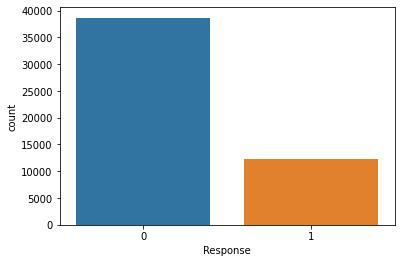

In [ ]:
import seaborn as sns
sns.countplot(y)

**We can see clearly that there is a class imbalance so we will apply SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (50882, 13)
Shape of X after SMOTE: (77346, 13)


Accuracy = 0.84
Recall = 0.70



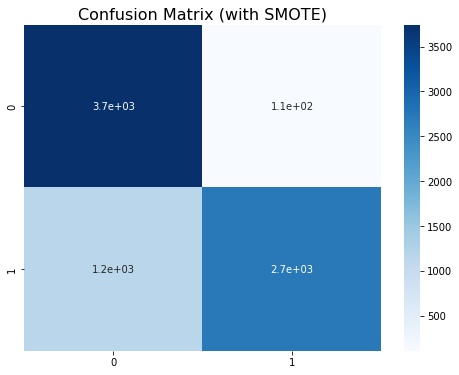

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.10, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
